In [1]:
#Importing neccesary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.cluster import KMeans

In [2]:
# Loading the cleaned dataset
df = pd.read_csv("cleaned_data.csv")
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),outliers,gender_encoded
0,Male,-1.424569,-1.738999,-0.434801,False,0
1,Male,-1.281035,-1.738999,1.195704,False,0
2,Female,-1.352802,-1.700830,-1.715913,False,1
3,Female,-1.137502,-1.700830,1.040418,False,1
4,Female,-0.563369,-1.662660,-0.395980,False,1


In [4]:
#Selecting relevant features for clustering 
# We use 'Annual Income (k$)'' and 'Spending Score (1-100)' as key indicators of customer segmentation

X = df[['Annual Income (k$)', 'Spending Score (1-100)']]
print(X.head())

   Annual Income (k$)  Spending Score (1-100)
0           -1.738999               -0.434801
1           -1.738999                1.195704
2           -1.700830               -1.715913
3           -1.700830                1.040418
4           -1.662660               -0.395980


In [5]:
# Finding the optimal number of clusters using the Elbow Method
wcss = []  # List to store Within-Cluster-Sum-of-Squares values

In [6]:
# Testing different values of 'k' (number of clusters)
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42) # Initialize K-Means 
    kmeans.fit(X) # Fit the model to the data
    wcss.append(kmeans.inertia_) #Store the WCSS (inertia) value

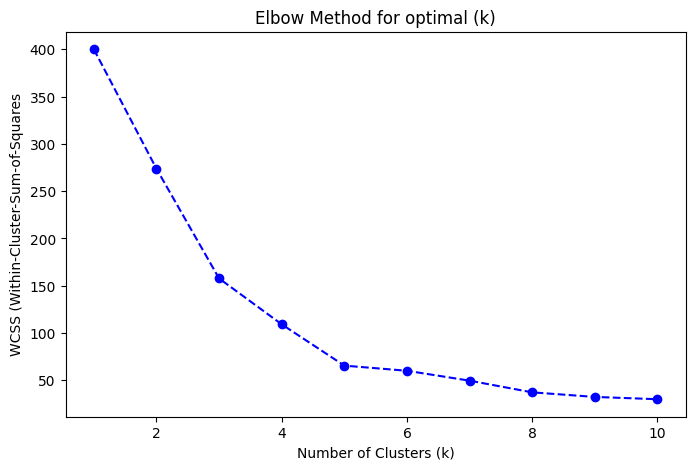

In [76]:
# Plot the Elbow Method graph 
plt.figure(figsize=(8,5))
plt.plot(range(1,11), wcss, marker='o', linestyle = '--', color='b')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS (Within-Cluster-Sum-of-Squares')
plt.title('Elbow Method for optimal (k)')
plt.savefig("kmeans_elbowmethod.png", dpi=300)
plt.show()


In [13]:

# For K = 4
optimal_k_4 = KMeans(n_clusters=4, init='k-means++', random_state=42)
df['Clusters_4'] = optimal_k_4.fit_predict(X)

#For K = 5
optimal_k_5 = KMeans(n_clusters=5 , init= 'k-means++', random_state=42)
df['Clusters_5'] = optimal_k_5.fit_predict(X)

### Visualize both K values for comparison 

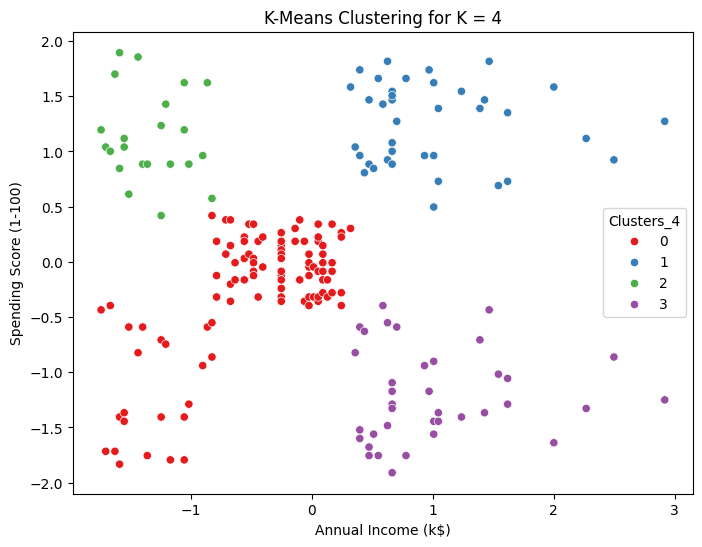

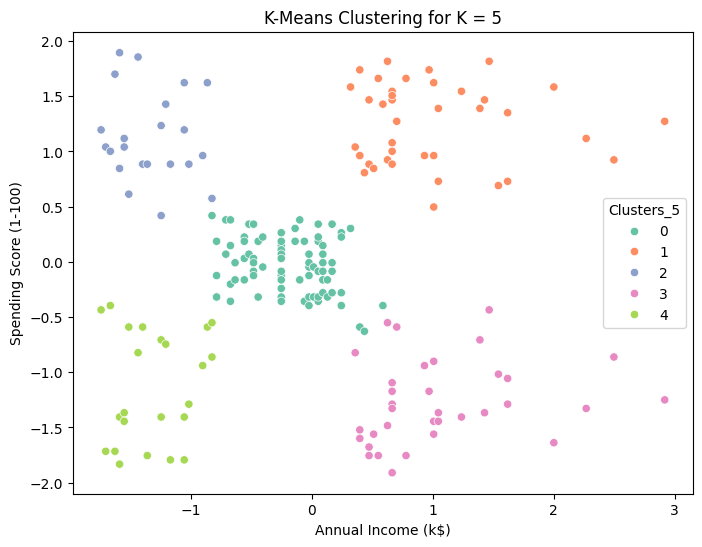

In [77]:
# For K = 4 

plt.figure(figsize=(8,6))
sns.scatterplot(x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['Clusters_4'], palette='Set1')
plt.title('K-Means Clustering for K = 4')
plt.savefig("kmeans_K=4.png", dpi=300)
plt.show()

# For K = 5 

plt.figure(figsize=(8,6))
sns.scatterplot( x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue=df['Clusters_5'], palette=('Set2'))
plt.title('K-Means Clustering for K = 5')
plt.savefig("kmeans_K=5.png", dpi=300)
plt.show()

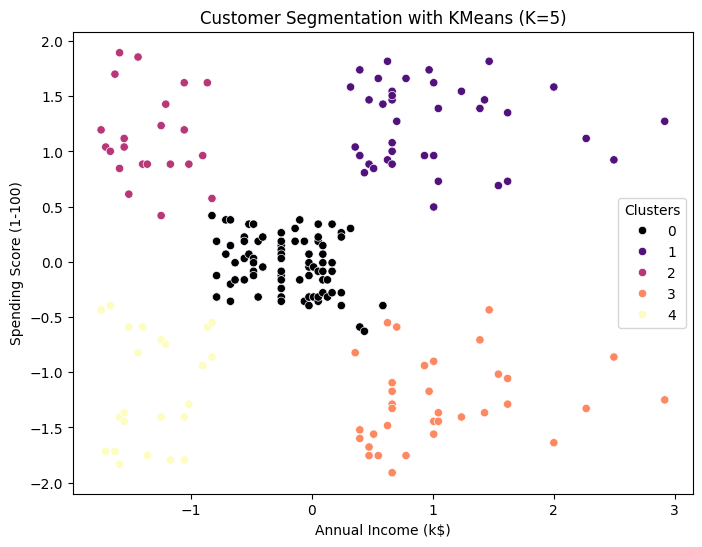

In [78]:
# ================================================ #
# 1️⃣ VISUALIZATION: CUSTOMER CLUSTERS (SCATTER PLOT)
# ================================================ #
# This plot shows how customers are segmented based on 
# their Annual Income and Spending Score.

plt.figure(figsize=(8,6))
sns.scatterplot( x = df['Annual Income (k$)'], y = df['Spending Score (1-100)'], hue = df['Clusters_5'], palette="magma")
plt.xlabel("Annual Income (k$)")
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Segmentation with KMeans (K=5)')
plt.legend(title="Clusters")
plt.savefig("kmeans_scatplot-cluster.png", dpi=300)
plt.show()

In [19]:
# ========================== #
# WHY DID WE CHOOSE K = 5?  #
# ========================== #

#    - When using K=4, one of the clusters was too large and contained diverse customer types.
#    - With K=5, the clusters were better separated, allowing for a more precise segmentation.
#    - The K=5 clustering plot showed more balanced groups.
#    - The middle-income customers were separated into meaningful subgroups.

In [27]:
# ================================================ #
# 2️⃣ VISUALIZATION: CLUSTER MEAN VALUES (HEATMAP)
# ================================================ #
# This heatmap displays the average income and spending score 
# for each cluster, helping us identify high and low spenders.

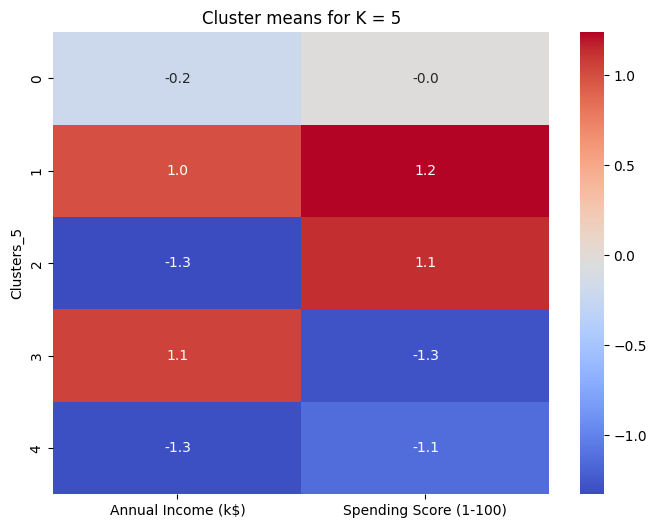

In [79]:
cluster_summary = df.groupby("Clusters_5")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
plt.figure(figsize=(8,6))
sns.heatmap(cluster_summary, annot = True, cmap='coolwarm', fmt='.1f')
plt.title('Cluster means for K = 5')
plt.savefig("kmeans_heatmap-cluster5.png", dpi=300)
plt.show()

In [34]:
cluster_labels = {
    0: "Average Customers",
    1: "VIP Customers", 
    2: "Young Spenders",
    3: "Wealthy Low-Spenders",
    4: "Budget Customers"
}

df["Segment"] = df['Clusters_5'].map(cluster_labels)


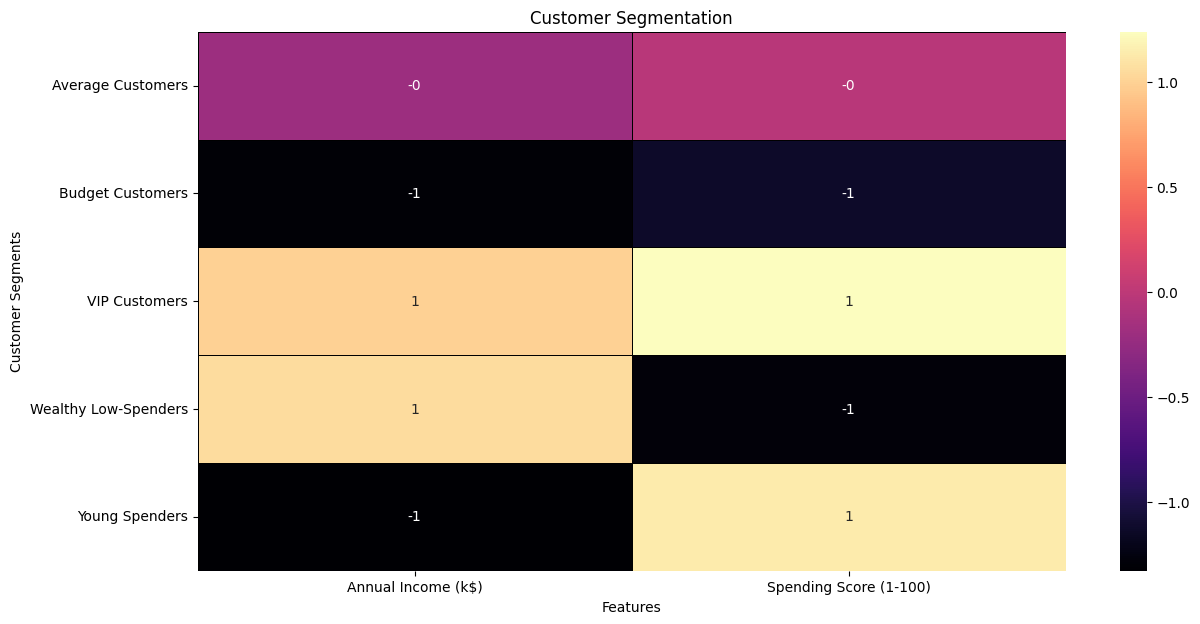

In [87]:
cluster_summary = df.groupby("Segment")[["Annual Income (k$)", "Spending Score (1-100)"]].mean()
plt.figure(figsize=(14,7))
sns.heatmap(cluster_summary, annot=True, cmap="magma", fmt='.0f', linewidths=0.5, linecolor="black")
plt.xlabel("Features")
plt.ylabel("Customer Segments")
plt.title("Customer Segmentation")
plt.savefig("kmeans_heatmap-segment.png", dpi=300)

In [50]:
# ============================================= #
# 3️⃣ VISUALIZATION: NUMBER OF CUSTOMERS PER SEGMENT (BAR PLOT)
# ============================================= #
# This bar plot displays the number of customers in each segment.
# It helps us understand the distribution of customer groups.
# The order of the bars is sorted from the largest to the smallest segment.

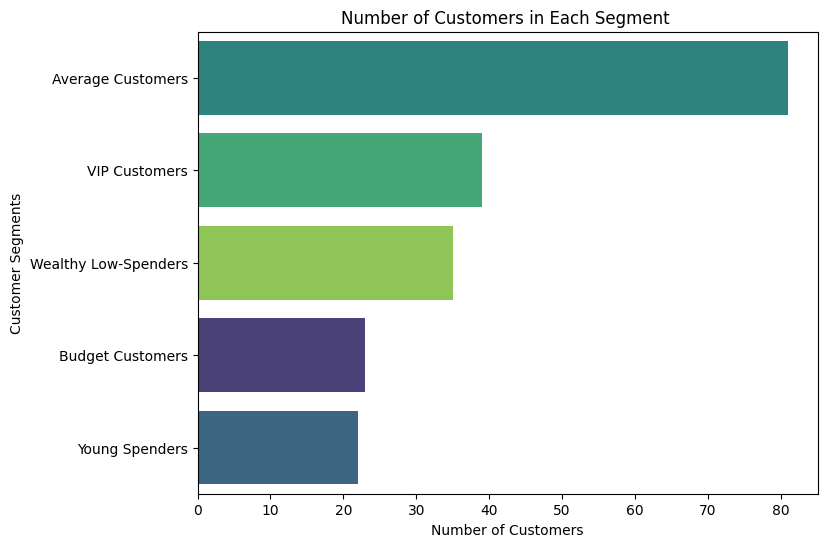

In [81]:
plt.figure(figsize=(8,6))
sns.countplot(y = df["Segment"], palette="viridis", order = df["Segment"].value_counts().index,hue = df["Segment"], legend=False)

plt.title("Number of Customers in Each Segment ")
plt.xlabel("Number of Customers")
plt.ylabel("Customer Segments")

plt.savefig("kmeans_barplot-numberofcustomer.png", dpi=300)
plt.show()

In [52]:
# ============================================= #
# 4️⃣ VISUALIZATION: AGE DISTRIBUTION ACROSS SEGMENTS (BOXPLOT)
# ============================================= #
# This boxplot shows the age distribution of customers within each segment.
# The box represents the interquartile range (IQR), and the line inside 
# represents the median age for each segment.
# Outliers are shown as individual points beyond the whiskers.

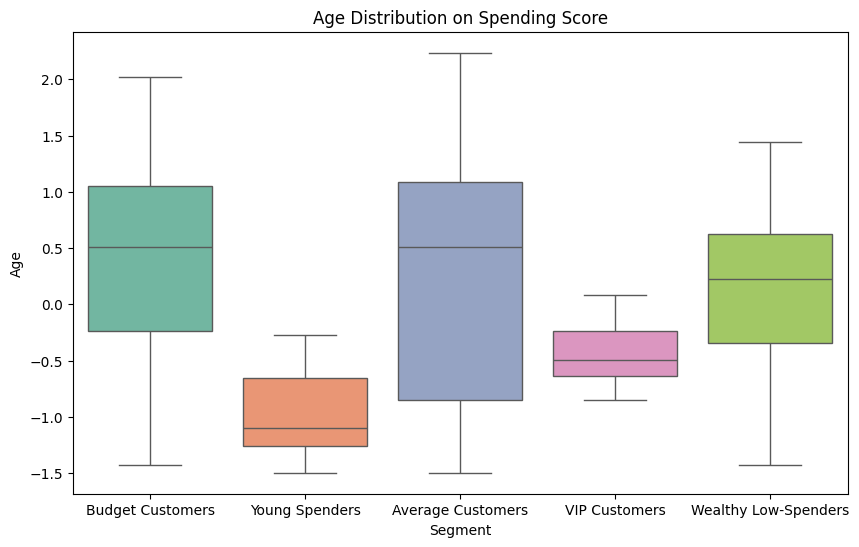

In [82]:
plt.figure(figsize=(10,6))
sns.boxplot(x = df['Segment'], y = df['Age'], data=df, palette="Set2", hue=df["Segment"], legend=False)

plt.title("Age Distribution on Spending Score")
plt.xlabel("Segment")
plt.ylabel("Age")

plt.savefig("kmeans_boxplot-agedistribution.png", dpi=300)
plt.show()

In [68]:
# ========================================================= #
# 5️⃣ VISUALIZATION: CUSTOMER AGE DISTRIBUTION BY SEGMENT (HISTOGRAM)
# ========================================================= #
# This histogram shows the distribution of customer ages within each segment.
# The original (unscaled) age values are used to provide accurate insights.
# Different segments are represented by different colors.
# The bars are stacked to compare segment distributions.

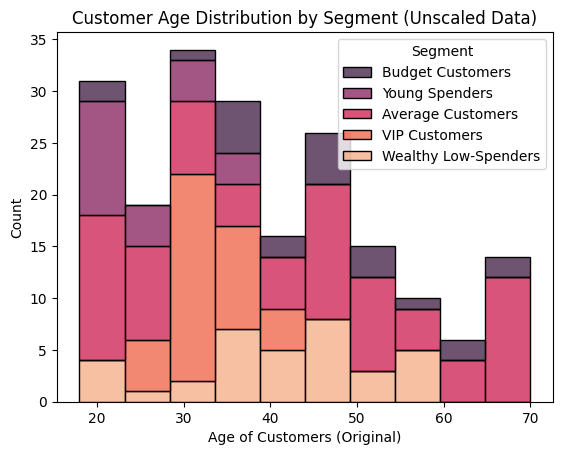

In [83]:
df_raw = pd.read_csv("Mall_Customers.csv")

df["Age_original"] = df_raw["Age"]

sns.histplot(data=df, x = df["Age_original"],hue="Segment", multiple="stack", palette="rocket", bins=10)
plt.xlabel("Age of Customers (Original)")
plt.ylabel("Count")
plt.title("Customer Age Distribution by Segment (Unscaled Data)")
plt.savefig("kmeans_hist-agedistsegment.png", dpi=300)

In [73]:
# ========================================================= #
# 6️⃣ VISUALIZATION: 3D CUSTOMER SEGMENTATION SCATTER PLOT
# ========================================================= #
# This 3D scatter plot visualizes customer segmentation using three key features:
# - X-axis: Age (Original, Unscaled)
# - Y-axis: Annual Income (k$)
# - Z-axis: Spending Score (1-100)
# - Color: Cluster Labels (K-Means, k=5)
# This visualization helps to understand how customers are grouped into segments.

In [70]:
from mpl_toolkits.mplot3d import Axes3D 

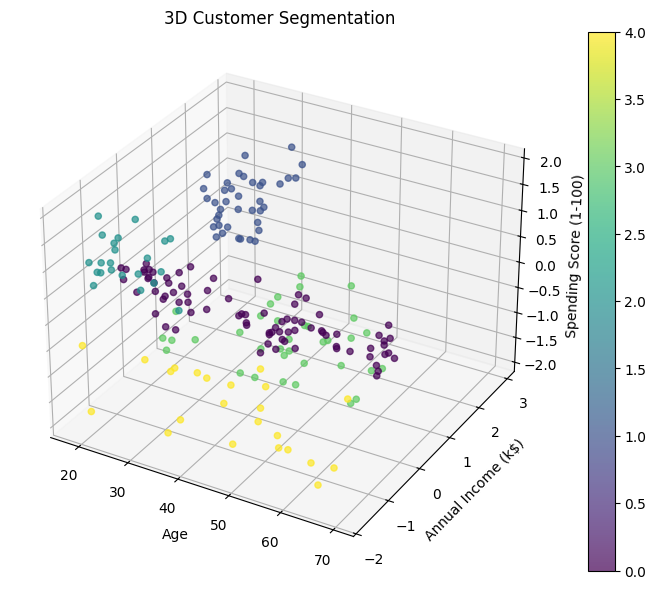

In [84]:
fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111, projection ='3d')

#3D Scatter Plot 
scatter = ax.scatter(df["Age_original"], df["Annual Income (k$)"], df["Spending Score (1-100)"], 
                     c = df['Clusters_5'], cmap='viridis', alpha = 0.7)
ax.set_xlabel("Age")
ax.set_ylabel("Annual Income (k$)")
ax.set_zlabel("Spending Score (1-100)")
ax.set_title("3D Customer Segmentation")

plt.colorbar(scatter)
plt.savefig("kmeans_3D.png", dpi=300)
plt.show()